In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


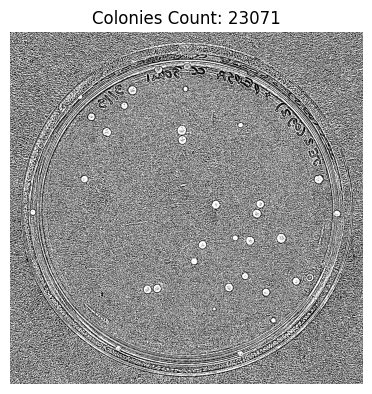

In [71]:
import cv2
import numpy as np

def count_colonies_within_petri_dish(image_path):
    # Constants
    approximate_colony_radius_pixels = 15
    edge_exclusion_margin = 50

    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # Apply adaptive thresholding
    binary = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Threshold the binary image using Otsu's method
    _, threshed = cv2.threshold(binary, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by area
    min_area = 3
    max_area = 20
    filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

    # Count the number of filtered contours (colonies)
    colony_count = len(filtered_contours)

    # Draw the filtered contours on the original image
    colony_image = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
    cv2.drawContours(colony_image, filtered_contours, -1, (0, 255, 0), 2)

    return threshed, colony_image, colony_count

sample_file = "sample-images/test_CFU_Plate_Pics/34.png"
result_image, colony_image, count = count_colonies_within_petri_dish(sample_file)

# Plot the binary image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(result_image, cmap='gray')
plt.axis('off')
plt.title(f'Colonies Count: {count}')

# Plot the original image with the colonies circled
# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(colony_image, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.title(f'Colonies Count: {count}')

# plt.tight_layout()
plt.show()